In [164]:
%reset
%pylab inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Populating the interactive namespace from numpy and matplotlib


In [1]:
import loadmat
from __future__ import division
import pandas as pd
import os
import cPickle as pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
#import brewer2mpl


In [2]:
SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta/'
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs_dropSR.csv')
df = pd.read_csv(filename)


In [31]:
#percent of trials excluded
percent_excluded = dict()
tmp = []
numtrials = 0
for i in df.groupby(['subj','task']):
    subj, task = i[0]


    filename = os.path.join(SJdir, 'Subjs', subj, task, 'HG_elecMTX_zscore.mat')
    data_dict = loadmat.loadmat(filename)
    RTs = data_dict['RTs']

    if task in ['EmoRep']:

        if subj in ['JH10','JH2','JH5','JH6','GP15','GP35','ST13','ST1','ST6', 'ST4']:
            numtrials = 105 * 2
        elif subj in ['JH17','ST15']:
            numtrials = 105
        elif subj in ['GP28']:
            numtrials = 105 * 3

        
#         percent_excluded[subj] = (numtrials - len(RTs)) / numtrials
        
#         print (subj, len(RTs), numtrials, percent_excluded[subj])

    
    if task in ['SelfAud']:
        filename = os.path.join(SJdir, 'Subjs', subj, task, 'HG_elecMTX_zscore.mat')
        data_dict = loadmat.loadmat(filename)
        RTs = data_dict['RTs']

        numtrials = 132
        
#         percent_excluded[subj] = (numtrials - len(RTs)) / numtrials
        
#         print (subj, len(RTs), numtrials, percent_excluded[subj])

    if task in ['EmoGen']:
        filename = os.path.join(SJdir, 'Subjs', subj, task, 'HG_elecMTX_zscore.mat')
        data_dict = loadmat.loadmat(filename)
        RTs = data_dict['RTs']

        if subj in ['GP35','JH2']:
            numtrials = 105 * 2
        elif subj in ['GP15']:
            numtrials = 105 * 3
        elif subj in ['ST1']:
            numtrials = 105 * 4
    
#         percent_excluded[subj] = (numtrials - len(RTs)) / numtrials
        
#        print (subj, len(RTs), numtrials, percent_excluded[subj])

    tmp.append((subj, task, len(RTs), np.mean(RTs), stats.sem(RTs), numtrials))

In [32]:
pd.DataFrame(tmp)

,0,1,2,3,4,5
0,CP7,DecisionAud,124,2064.096774,53.877596,0
1,CP9,DecisionAud,260,2245.357692,8.858125,0
2,GP15,EmoGen,147,2002.870748,57.461678,315
3,GP15,EmoRep,114,1003.201754,12.085623,210
4,GP15,FaceEmo,131,750.923664,13.545489,210
5,GP15,FaceGen,131,717.862595,12.284424,210
6,GP15,SelfAud,82,1657.036585,57.514787,132
7,GP15,SelfVis,77,1068.064935,36.009389,132
8,GP28,SelfAud,74,1291.513514,49.944050,132
9,GP28,SelfVis,84,1666.059524,62.487177,132


In [32]:
pd.DataFrame(tmp)

,0,1,2,3,4,5
0,CP7,DecisionAud,124,2064.096774,53.877596,0
1,CP9,DecisionAud,260,2245.357692,8.858125,0
2,GP15,EmoGen,147,2002.870748,57.461678,315
3,GP15,EmoRep,114,1003.201754,12.085623,210
4,GP15,FaceEmo,131,750.923664,13.545489,210
5,GP15,FaceGen,131,717.862595,12.284424,210
6,GP15,SelfAud,82,1657.036585,57.514787,132
7,GP15,SelfVis,77,1068.064935,36.009389,132
8,GP28,SelfAud,74,1291.513514,49.944050,132
9,GP28,SelfVis,84,1666.059524,62.487177,132


In [125]:
#number of elecs analyzed (counting each subject one time)
cnt = 0
for i in df.drop_duplicates(['subj']).iterrows():
    subj = i[1].subj
    task = i[1].task
    if subj in ['ST27','ST32','CP9','CP7']:
        num_elecs = 0
        filename = os.path.join(SJdir, 'Subjs', subj, task, 'subj_globals.mat')
        data_dict = loadmat.loadmat(filename)
        num_elecs = data_dict['elecs'].shape[0]
    else:
        filename = os.path.join(SJdir, 'Subjs', subj, task, 'gdat_notch.mat')
        data_dict = loadmat.loadmat(filename)
        gdat = data_dict['gdat']

        num_elecs = sum(gdat[:,1]!=0)
    cnt+=num_elecs
cnt

1344

In [130]:
#number of active elecs (counting each subj one time)
cnt = 0
for i in df.drop_duplicates(['subj']).iterrows():
    subj = i[1].subj
    task = i[1].task

    filename = os.path.join(SJdir, 'Subjs', subj, task, 'HG_elecMTX_zscore.mat')
    data_dict = loadmat.loadmat(filename)
    data = data_dict['data_zscore']

    num_elecs = data.shape[0]
    cnt+=num_elecs
cnt

392

In [142]:
#number of active elecs (counting each subj/task dataset)
cnt = 0
tmp = list()
for i in df.groupby(['subj','task']):
    subj, task = i[0]
    
    filename = os.path.join(SJdir, 'Subjs', subj, task, 'HG_elecMTX_zscore.mat')
    data_dict = loadmat.loadmat(filename)
    data = data_dict['data_zscore']
    tmp.append( (subj, task, data.shape[0]))
    num_elecs = data.shape[0]
    cnt+=num_elecs
cnt

835

In [4]:
#number of elecs analyzed per subject
elec_dict = dict()
for i in df.drop_duplicates(['subj']).iterrows():
    subj = i[1].subj
    task = i[1].task
    if subj in ['ST27','ST32','CP9','CP7']:
        num_elecs = 0
        filename = os.path.join(SJdir, 'Subjs', subj, task, 'subj_globals.mat')
        data_dict = loadmat.loadmat(filename)
        num_elecs = data_dict['elecs'].shape[0]
    else:
        filename = os.path.join(SJdir, 'Subjs', subj, task, 'gdat_notch.mat')
        data_dict = loadmat.loadmat(filename)
        gdat = data_dict['gdat']

        num_elecs = sum(gdat[:,1]!=0)
    elec_dict[subj] = num_elecs

In [5]:
elec_dict

{'CP7': 108,
 'CP9': 97,
 'GP15': 74,
 'GP28': 60,
 'GP35': 63,
 'JH10': 90,
 'JH17': 99,
 'JH2': 103,
 'JH5': 62,
 'JH6': 89,
 'ST1': 70,
 'ST15': 104,
 'ST27': 81,
 'ST32': 80,
 'ST4': 90,
 'ST6': 74}

In [20]:
#number of active elecs per subject (active in at least one task)
active_dict = dict()
for i in df.groupby(['subj']):
    subj = i[0]
    tmp = []
    for task in np.unique(i[1].task):
        filename = os.path.join(SJdir, 'Subjs', subj, task, 'HG_elecMTX_zscore.mat')
        data_dict = loadmat.loadmat(filename)
        active_elecs = data_dict['active_elecs']

        tmp.extend(active_elecs)
    num_elecs = len(np.unique(tmp))
    active_dict[subj] = num_elecs


In [23]:
active_dict

{'CP7': 18,
 'CP9': 40,
 'GP15': 45,
 'GP28': 29,
 'GP35': 47,
 'JH10': 31,
 'JH17': 58,
 'JH2': 38,
 'JH5': 22,
 'JH6': 28,
 'ST1': 10,
 'ST15': 37,
 'ST27': 31,
 'ST32': 24,
 'ST4': 18,
 'ST6': 15}

In [156]:
df.groupby(['subj','elec']).elec.count().shape

(434,)

In [88]:
frontal = ['Broca','FrPole','IFG','MFG','MFG_premot','OFC','PreSMA','Pre_centrl','SFG','SMA','dACC','preSMA', 'R_IFG','R_MFG','R_MFG_premot', 'R_PreSMA','R_Pre_centrl','R_SMA','R_dACC']
df_nofrontal = df[~(df.ROI.isin(frontal))]


In [110]:
#drop SR elecs from stim locked analyses (because are SR but look like R)
SR_elecs_to_drop = [('GP15','SelfVis',53), ('GP28','SelfVis',44), ('GP28','SelfVis',53), ('GP28','SelfVis',54), ('GP28','SelfVis',62), ('GP28', 'SelfVis', 63), ('JH2','SelfVis',48), ('ST6','SelfVis',50), ('ST6','SelfVis', 51)]
SR_elecs_to_drop = pd.DataFrame(SR_elecs_to_drop, columns = ['subj','task','elec'])
pd.merge(df, SR_elecs_to_drop, how = 'inner', on = ['subj','task','elec'])

SR_elecs_to_drop['key'] = 'x'
temp_df = pd.merge(df, SR_elecs_to_drop, on=['subj','task','elec'], how='left')
df = temp_df[temp_df['key'].isnull()].drop('key', axis=1)


#filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs_dropSR.csv')
#df.to_csv(filename, index = False)

In [ ]:
#drop my subjects
df = df.query("task not in ['DecisionAud', 'DecisionVis']")

In [8]:
#create and save data
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs_dropSR.csv')
df = pd.read_csv(filename)

for p in ['S','R','SR','D']:
    cdata_all, subjs_all, tasks_all, offsets_all = [pd.DataFrame() for i in range(4)]
    
    for i in df.groupby(['subj','task']):
        subj, task = i[0]
        filename = os.path.join(SJdir, 'Subjs', subj, task, 'HG_elecMTX_zscore.mat')
        data_dict = loadmat.loadmat(filename)
        data = data_dict['data_zscore']
        active_elecs = data_dict['active_elecs']
        RTs = data_dict['RTs']
        #offsets = data_dict['offsets_stim'] - data_dict['onsets_stim'] #stim offsets relative to onset (durations)
        
        elecs = list(i[1][i[1].pattern == p].elec)
        
        if len(elecs)>0: #the pattern exists
            eidx = np.in1d(active_elecs, elecs)
            RTs_all = np.tile(RTs, sum(eidx))
            datastack = np.vstack(data[eidx,:,:])
            cdata_all = cdata_all.append(pd.DataFrame(datastack, index = RTs_all))
            
            subjs_all = subjs_all.append(pd.DataFrame(np.tile(subj, RTs_all.shape), index = RTs_all))
            tasks_all = tasks_all.append(pd.DataFrame(np.tile(task, RTs_all.shape), index = RTs_all))
            #offsets_all = offsets_all.append(pd.DataFrame(np.tile(offsets, sum(eidx)), index = RTs_all))
            
            print (p, cdata_all.shape)

    #sort all trials and prepare RTs
    alldata = cdata_all.sort_index(inplace=False)
    alldata = alldata.fillna(0)
    allRTs = alldata.index.values
    allRTs = np.array([x for x in allRTs])
    alldata = np.array(alldata)
    
    #sort subjs, tasks, and offsets
    allsubjs = np.array(subjs_all.sort_index(inplace = False).squeeze())
    alltasks = np.array(tasks_all.sort_index(inplace = False).squeeze())
    #alloffsets = np.array(offsets_all.sort_index(inplace = False).squeeze())
    
    print alldata.shape
    
    alloffsets = [] #my data has no offsets
    
    data_dict = {'alldata':alldata, 'allRTs':allRTs, 'allsubjs':allsubjs, 'alltasks':alltasks, 'alloffsets':alloffsets}
    #filename= os.path.join(SJdir, 'SingleTrials','alltrials','data', 'singletrials_allelecs_smooth_nodecision_' + p + '_dropSR.mat')
    filename= os.path.join(SJdir, 'SingleTrials','alltrials','data', 'singletrials_allelecs_smooth_' + p + '_dropSR.mat')
    
    #spio.savemat(filename, data_dict)

('S', (496, 5362))
('S', (1796, 5362))
('S', (2594, 5362))
('S', (3168, 5362))
('S', (3376, 5362))
('S', (3708, 5362))
('S', (4258, 5362))
('S', (4929, 5362))
('S', (5579, 5362))
('S', (5795, 5362))
('S', (6535, 5362))
('S', (7591, 5362))
('S', (7879, 5362))
('S', (7965, 5362))
('S', (8095, 5362))
(8095, 5362)
('R', (868, 5362))


KeyboardInterrupt: 

In [33]:
## make empty data
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs_dropSR.csv')
df = pd.read_csv(filename)

#create and save data
for p in ['D','R','SR']:
    cdata_all, subjs_all, tasks_all, offsets_all = [pd.DataFrame() for i in range(4)]

    for i in df.groupby(['subj','task']):
        subj, task = i[0]
        if not((subj,task) in [('GP15','EmoGen'), ('GP35','EmoGen'), ('JH2','EmoGen')]): #only these have empty
            continue

        filename = os.path.join(SJdir, 'Subjs', subj, task, 'HG_elecMTX_percent_empty.mat')

        data_dict = loadmat.loadmat(filename)
        data = data_dict['data_zscore']
        active_elecs = data_dict['active_elecs']
        onsets = data_dict['onsets_empty']
        #offsets = data_dict['offsets_stim'] - data_dict['onsets_stim'] #stim offsets relative to onset (durations)
        elecs = list(i[1][i[1].pattern == p].elec)

        if len(elecs)>0: #the pattern exists
            eidx = np.in1d(active_elecs, elecs)

            datastack = np.vstack(data[eidx,:,:])
            cdata_all = cdata_all.append(pd.DataFrame(datastack, index = range(datastack.shape[0])))
            
            subjs_all = subjs_all.append(pd.DataFrame(np.tile(subj, datastack.shape[0])))
            tasks_all = tasks_all.append(pd.DataFrame(np.tile(task, datastack.shape[0])))
            #offsets_all = offsets_all.append(pd.DataFrame(np.tile(offsets, sum(eidx))))
            print (p, len(onsets), datastack.shape, datastack.shape[0]/len(onsets))
            
    #sort all trials and prepare RTs
    alldata = cdata_all
    alldata = alldata.fillna(0)
    alldata = np.array(alldata)
    
    #sort subjs, tasks, and offsets
    allsubjs = np.array(subjs_all.sort_index(inplace = False).squeeze())
    alltasks = np.array(tasks_all.sort_index(inplace = False).squeeze())
    #alloffsets = np.array(offsets_all.sort_index(inplace = False).squeeze())

    data_dict = {'alldata':alldata, 'allsubjs':allsubjs} #, 'alltasks':alltasks, 'alloffsets':alloffsets}
    filename= os.path.join(SJdir, 'SingleTrials','alltrials','data', 'singletrials_allelecs_smooth_nodecision_' + p + '_dropSR_empty.mat')
    spio.savemat(filename, data_dict)


('D', 42, (714, 4799), 17.0)
('D', 14, (238, 3945), 17.0)
('D', 46, (782, 4751), 17.0)
('R', 42, (336, 4799), 8.0)
('R', 14, (168, 3945), 12.0)
('R', 46, (92, 4751), 2.0)
('SR', 42, (168, 4799), 4.0)
('SR', 14, (126, 3945), 9.0)
('SR', 46, (276, 4751), 6.0)


In [181]:
#load data (without my data)
p = 'R'
filename= os.path.join(SJdir, 'SingleTrials','alltrials','data', 'singletrials_allelecs_smooth_nodecision_' + p + '_dropSR.mat')
data_dict = loadmat.loadmat(filename)
alldata, allRTs = [data_dict.get(key) for key in ['alldata','allRTs']]

In [182]:
#drop any trial that is >3000ms
idx = (allRTs<3000)
allRTs = allRTs[idx]
alldata = alldata[idx,:max(allRTs+500)]

In [183]:
import scipy.ndimage as ndimage
import matplotlib.ticker as ticker

In [184]:
#tmp[(abs(alldata) < 1.96), -1] = 0.1

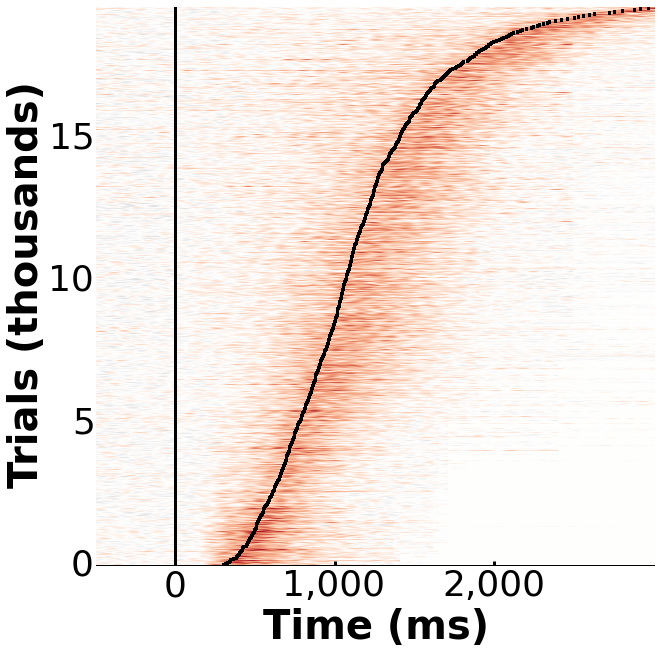

In [185]:
#plot
f,ax = plt.subplots(figsize = (10, 10))
cm = plt.get_cmap('RdGy_r')


ax.autoscale(enable = True, tight = True)
ax.patch.set_facecolor('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.xaxis.set_tick_params(labelsize = 36, width = 3)
ax.yaxis.set_tick_params(labelsize = 36, width = 0)
ax.set_xticks(np.arange(0, 3000, 1000))
ax.axvline(x = 0, lw = 3, color = 'black')
ax.set_ylabel('Trials (thousands)', fontsize = 40, weight = 'bold')
ax.set_xlabel('Time (ms)', fontsize = 40, weight = 'bold')
#ax.ticklabel_format(style = 'sci', axis = 'y', scilimits = (0,0))

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: ('%.0f')%(y*1e-3)))
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


#cax = ax.pcolormesh(np.arange(-500, alldata.shape[1]-500), np.arange(0, len(allRTs)), alldata * (abs(alldata)>1.96), zorder = 0)# , cmap = plt.get_cmap('bwr_r'))
img = ndimage.gaussian_filter1d(alldata, axis = 0, sigma = 10, order=0) #gaussian smooth trials
cax = ax.imshow(img, aspect = 'auto', origin = 'lower', extent = (-500, img.shape[1]-500, 0, len(allRTs)), cmap = cm)

cax.set_clim(vmin=-3,vmax=3)

for j in np.arange(len(allRTs)):
    ax.plot((allRTs[j], allRTs[j]), (j-0.5, j+0.5), 'black', linewidth = 3,zorder = 1)

#ax.set_title(p)

#cbar = f.colorbar(cax, ticks = [-3, 0 , 3], orientation = 'horizontal')

# text = cbar.ax.yaxis.label
# font = matplotlib.font_manager.FontProperties(size = 40, weight = 'bold')
# text.set_font_properties(font)

#cbar.ax.set_xlabel('HG (zscore)', fontsize = 36, fontweight = 'bold')
#cbar.ax.tick_params(labelsize=36) 

filename= os.path.join(SJdir, 'SingleTrials', 'alltrials', 'redgray', '_'.join(['singletrials','allelecs','smooth',p,'scale3','mask95ci','nodecision','max3000_commas.png']))
plt.savefig(filename, bbox_inches = 'tight', dpi = 150)

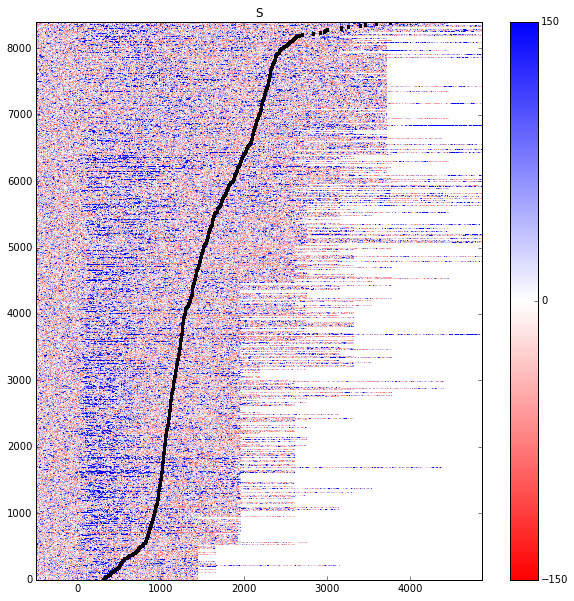

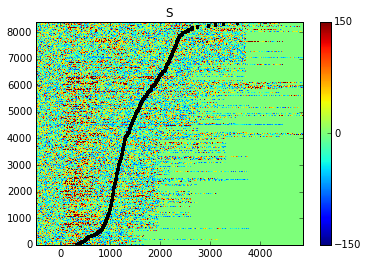

In [25]:
#mean trace for all duration elecs up to median RT for that trial
#create and save data
set2 = brewer2mpl.get_map('Dark2', 'Qualitative', 8).mpl_colors
task_list = ['DecisionVis','FaceGen','FaceEmo','EmoRep','DecisionAud','SelfAud','SelfVis','EmoGen']
color_dict = dict(zip(task_list, set2))
colors = list()
cdata_all = pd.DataFrame()

for i in df.groupby(['subj','task']):
    subj, task = i[0]
    filename = os.path.join(SJdir, 'Subjs', subj, task, 'HG_elecMTX_percent.mat')
    data_dict = loadmat.loadmat(filename)
    data = data_dict['data_percent']
    active_elecs = data_dict['active_elecs']
    RTs = data_dict['RTs']
    srate = data_dict['srate']
    bl_st = data_dict['Params']['bl_st']/1000*srate
    
    elecs = list(i[1][i[1].pattern == 'D'].elec)
    if len(elecs)>0: #the pattern exists
        eidx = np.in1d(active_elecs, elecs)
        end_idx = np.median(RTs)
        
        datastack = (data[eidx,:,:end_idx+abs(bl_st)]).mean(axis = 1).mean(axis = 0).squeeze() #ave of all dur elecs

        cdata_all = cdata_all.append(pd.DataFrame(datastack).transpose())
        
        colors.append(color_dict[task]) #build list of colors
        #print (subj, task, color_dict[task])

('CP7', 'DecisionAud', (0.4, 0.6509803921568628, 0.11764705882352941))
('GP15', 'EmoGen', (0.4, 0.4, 0.4))
('GP15', 'EmoRep', (0.9058823529411765, 0.1607843137254902, 0.5411764705882353))
('GP15', 'FaceEmo', (0.4588235294117647, 0.4392156862745098, 0.7019607843137254))
('GP15', 'FaceGen', (0.8509803921568627, 0.37254901960784315, 0.00784313725490196))
('GP15', 'SelfAud', (0.9019607843137255, 0.6705882352941176, 0.00784313725490196))
('GP15', 'SelfVis', (0.6509803921568628, 0.4627450980392157, 0.11372549019607843))
('GP28', 'SelfAud', (0.9019607843137255, 0.6705882352941176, 0.00784313725490196))
('GP35', 'EmoGen', (0.4, 0.4, 0.4))
('GP35', 'EmoRep', (0.9058823529411765, 0.1607843137254902, 0.5411764705882353))
('GP35', 'FaceEmo', (0.4588235294117647, 0.4392156862745098, 0.7019607843137254))
('GP35', 'FaceGen', (0.8509803921568627, 0.37254901960784315, 0.00784313725490196))
('JH10', 'SelfAud', (0.9019607843137255, 0.6705882352941176, 0.00784313725490196))
('JH17', 'SelfAud', (0.90196078

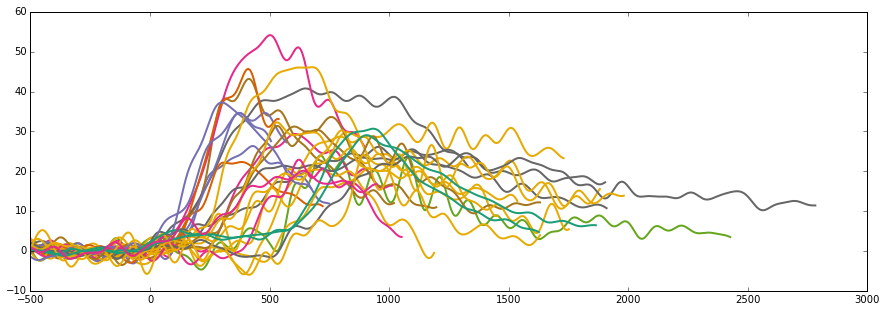

In [45]:
f, ax = plt.subplots(figsize = (15,5))
#plt.plot(range(-500, cdata_all.shape[1]-500), np.array(cdata_all.transpose()), linewidth = 2, alpha = 0.5)

for i in range(len(colors)):
    plt.plot(range(-500, cdata_all.shape[1]-500), np.array(cdata_all.iloc[i,:]), color = colors[i], lw = 2)

filename= os.path.join(SJdir, 'SingleTrials', 'alltrials', 'meantrace_alldurationelecs.png')
plt.savefig(filename)

In [97]:
#filename = os.path.join(SJdir, 'PCA','Stats', 'single_electrode_windows_csvs', 'single_electrode_windows_withdesignation_EDITED_dropped_unsmoothed.csv')
#df = pd.read_csv(filename)
df = df.query("subj not in ['GP27', 'ST28', 'GP44']")
PFC = ['Broca','FrPole','IFG','MFG','MFG_premot','OFC','PreSMA','Pre_centrl','SFG','SMA','dACC','preSMA']


In [93]:
sum(df[df.pattern == 'D'].ROI.isin(LPFC)) / df[df.pattern == 'D'].ROI.shape[0]

0.72839506172839508

In [102]:

sum(df[df.ROI.isin(PFC)].pattern == 'D') /df[df.ROI.isin(PFC)].shape[0]

0.58803986710963452

In [123]:
print 'S %.3f' %(sum(df.pattern == 'S') / df.shape[0])
print 'SR %.3f' %(sum(df.pattern == 'SR') / df.shape[0])
print 'D %.3f' %(sum(df.pattern == 'D') / df.shape[0])
print 'R %.3f' %(sum(df.pattern == 'R') / df.shape[0])


(df[df.pattern == 'D'].groupby('ROI')).subj.count()

tmp = df.groupby(['ROI','pattern']).subj.count()

filename = os.path.join(SJdir, 'PCA', 'ROI_stats.csv')
tmp.to_csv(filename)

S 0.135
SR 0.225
D 0.322
R 0.294


In [177]:
tmp = df.query("task in ['DecisionAud','DecisionVis']")
print sum(tmp.pattern == 'D')
tmp.shape

36


(100, 23)

In [ ]:
#PCA for Avgusta

In [178]:
df = pd.read_csv('/home/knight/matar/MATLAB/DATA/Avgusta/PCA/Stats/Networks/unsmoothed/PCA_medians/networks/all_subjects_thresh_medians_withclusters.csv')


In [219]:
len("['PC4','PC1']".split(','))

2

In [224]:
idx = df.pc_list.apply(lambda x: x.split(',')).apply(len)>1
df_multiplePC = df.loc[idx]

filename = os.path.join(SJdir, 'PCA','Stats','Networks','unsmoothed','PCA_medians','networks','all_subjects_thresh_medians_withclusters_multiplePCs.csv')
df_multiplePC.to_csv(filename)

In [20]:
#average stim length and STD for EmoRep and SelfAud
stimlength = []
for i in df.groupby(['subj','task']):
    subj, task = i[0]
    if task not in ['SelfAud']:
        continue
    filename = os.path.join(SJdir, 'Subjs', subj, task, 'HG_elecMTX_zscore.mat')
    data_dict = loadmat.loadmat(filename)
    stimlength.extend(data_dict['offsets_stim'] - data_dict['onsets_stim'])
    

In [21]:
print 'SelfAud'
print 'min %.2f' %(np.min(stimlength))
print 'max %.2f' %(np.max(stimlength))
print 'mean %.2f' %(np.mean(stimlength))
print 'sem %.2f' %(stats.sem(stimlength))

SelfAud
min 305.00
max 1024.00
mean 675.89
sem 4.50


In [18]:
print 'EmoRep'
print 'min %.2f' %(np.min(stimlength))
print 'max %.2f' %(np.max(stimlength))
print 'mean %.2f' %(np.mean(stimlength))
print 'sem %.2f' %(stats.sem(stimlength))

EmoRep
min 210.00
max 1013.00
mean 642.86
sem 4.11


In [16]:
from scipy import stats